<class 'numpy.ndarray'> <class 'int'>
(181617,) 22050
3
(20, 355)


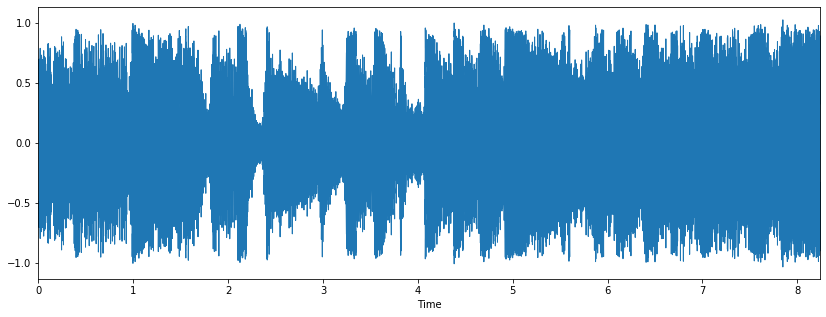

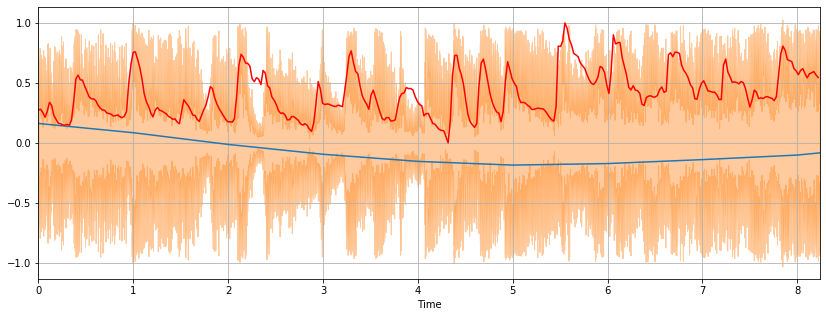

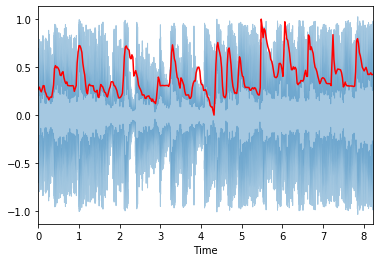

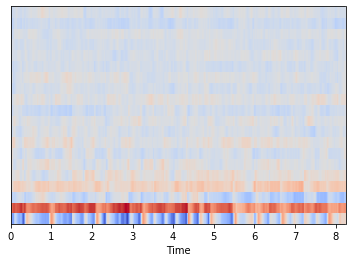

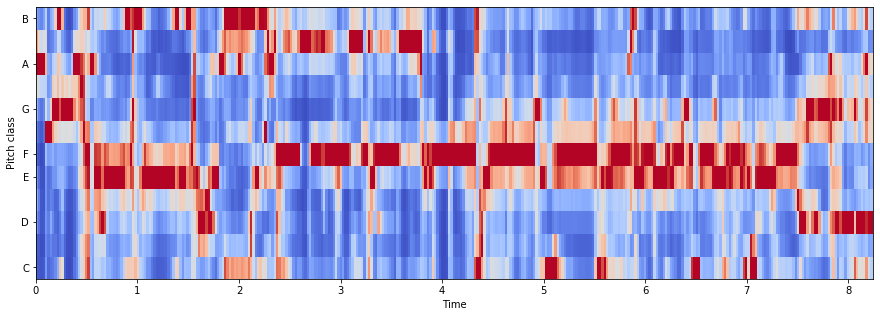

In [13]:
#reminder: move play audio widget down

#Sources:
#McFee, Brian, Colin Raffel, Dawen Liang, etc.
#"librosa: Audio and music signal analysis in python." SciPy conference Proceedings. 2015.

#G. Tzanetakis, P. Cook
#“Musical genre classification of audio signals." IEEE Transactions on Audio and Speech Processing. 2002.

#Brownlee, Jason. "How to Use the Keras Functional API for Deep Learning" Machine Learning Mastery. 2007.

import librosa
audio_path = 'rock.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

#above code gives an array of amplitudes and times in x. sr is the sampling rate, the default value of sr is 22.05kHz, so 22.05k samples per second of audio

import IPython.display as ipd
ipd.Audio(audio_path)

#using the IPython.display package, we can get a widget to play the audio

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#above code plots the audio amplitudes over time


#zero crossing: let's zoom in on one second of the music and count the number of times it crosses the x-axis
n0 = 1000
n1 = 1100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

#spectral centroid: gives the weighted mean of the frequencies present in the sound, a heavy metal song will have a centroid near the bottom of its frequency spectrum, blues song will have centroid near center.

#librosa has a spectral centroid function
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time from the # of frames for independent variable
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation with sklearn package
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#spectral rolloff: measures the shape of the signal by computing at each frame the rolloff frequency, the frequency below which a percentage, say 85%, of the energy lies. In other words finds the frequency range where the bulk of the energy of the wave lies
plt.figure()
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#NB that the spectral rolloff and centroid find properties of the wave's frequencies at each frame of time, then graph them as a function of time. The graphs are NOT amplitudes, so they are only useful to see relative changes in the wave when graphed alongside the wave's amplitude.

#mfccs: a set of 10-20 features modelled after the human voice that describe the shape of the spectral envelope:
plt.figure()
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#finally, the chroma function puts the spectral envelope into 12 bins for the 12 semitones of the octave. useful for differentiating genres by the variety of notes in a song
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
